In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


<h1>linear regression</h1>

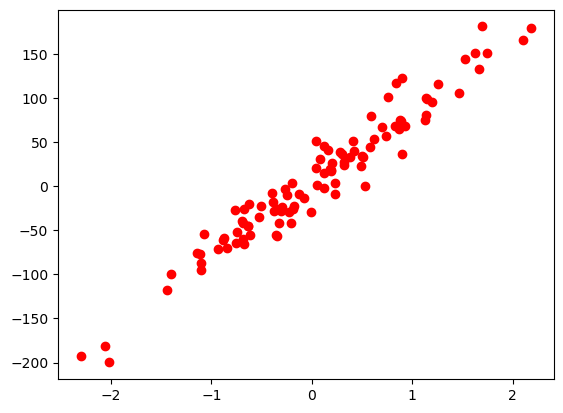

In [5]:
# 1. prepare data
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
x=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)
n_samples,n_features=x.shape
#plot data
plt.plot(X_numpy,y_numpy,'ro')




In [6]:
#2. model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)




In [7]:
#3. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [8]:
#4. traning the model
num_epochs = 100
for epoch in range(num_epochs):
    # Varibale=torch.Tensor(X_train)
    # X_train = Variable(torch.Tensor(X_train))
    # y_train = Variable(torch.Tensor(y_train))
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty the gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4462.6060
epoch: 20, loss = 3328.6318
epoch: 30, loss = 2507.9077
epoch: 40, loss = 1913.2788
epoch: 50, loss = 1482.0420
epoch: 60, loss = 1169.0210
epoch: 70, loss = 941.6208
epoch: 80, loss = 776.2963
epoch: 90, loss = 656.0179
epoch: 100, loss = 568.4554


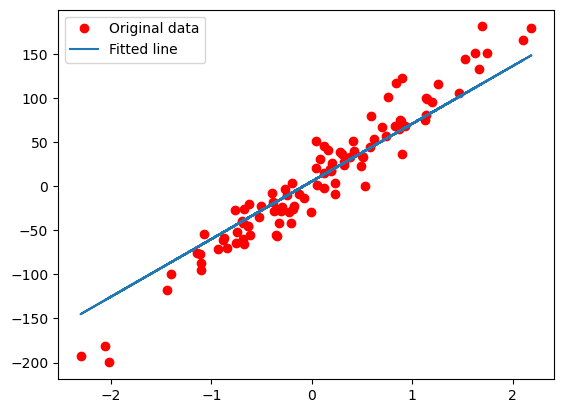

In [9]:
#5. plot the loss curve  
predicted=model(x).detach().numpy()
plt.plot(x.numpy(),y.numpy(),'ro',label='Original data')
plt.plot(x.numpy(),predicted,label='Fitted line')
plt.legend()
plt.show()



<h1>logostic regression</h1>

In [10]:
bc=datasets.load_breast_cancer()
X=bc.data
y=bc.target
n_samples,n_features=X.shape
# print(n_samples,n_features)

# 569 30
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)


In [11]:
#model
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model,self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred

#model
model = Model(n_features)


In [12]:
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [13]:
print(y_predicted.shape)
print(y_train.shape)


torch.Size([100, 1])
torch.Size([455, 1])


In [14]:
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(x_train)
    loss = criterion(y_predicted, y_train)
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
with torch.no_grad():
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')



epoch: 10, loss = 0.7259
epoch: 20, loss = 0.7054
epoch: 30, loss = 0.6860
epoch: 40, loss = 0.6677
epoch: 50, loss = 0.6505
epoch: 60, loss = 0.6342
epoch: 70, loss = 0.6188
epoch: 80, loss = 0.6042
epoch: 90, loss = 0.5904
epoch: 100, loss = 0.5773
accuracy = 0.7544


<h1> Batch Training

In [15]:
import torch
# import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math


class WineDataSet(Dataset):
    def __init__(self, *args, **kwargs):
        # super(CLASS_NAME, self).__init__(*args, **kwargs)
        xy=np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x=torch.from_numpy(xy[:,1:])
        self.y=torch.from_numpy(xy[:,0])
        self.n_sampels=xy.shape[0]
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_sampels
    

In [16]:
data=WineDataSet()
loader=DataLoader(data,batch_size=4,shuffle=True,num_workers=2)
#show use of dataloader



In [17]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Load the MNIST dataset
train_data = MNIST(root='data', train=True, download=True, transform=ToTensor())

# Create a DataLoader to iterate over the dataset in batches
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Iterate over the dataset in batches
for batch_idx, (data, target) in enumerate(train_loader):
    # Do something with the data and target
    print(f'Batch {batch_idx}: data shape = {data.shape}, target shape = {target.shape}')

Batch 0: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 1: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 2: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 3: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 4: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 5: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 6: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 7: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 8: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 9: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 10: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Batch 11: data shape = torch.Size([32, 1, 28, 28]), target shape = torch.Size([32])
Ba